# Regresión lineal

In [11]:
import pandas as pd

csv_path = './data/rl2.csv'
df = pd.read_csv(csv_path)
df.head()

,x,y
0,24,3115
1,35,5717
2,36,6387
3,36,6616
4,42,9666


### Añadimos una tercera columna

In [3]:
df["x2"] = df.x ** 2
df.head(10)

,x,y,x2
0,24,3115,576
1,35,5717,1225
2,36,6387,1296
3,36,6616,1296
4,42,9666,1764
5,63,20921,3969
6,79,30716,6241
7,87,37180,7569
8,88,41397,7744
9,92,43401,8464


In [6]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y test
train, test = train_test_split(df, test_size=0.33, random_state=42)

X_train = train.drop('y', axis=1)
y_train = train.y
X_test = test.drop('y', axis=1)
y_test = test.y


### Configuración del modelo

In [7]:
from sklearn. linear_model import LinearRegression

model = LinearRegression()

# Ajuste del modelo
model.fit(X_train , y_train)

# Imprimir los coeficientes y la intersección
print("Coeficientes (pesos/importancia de cada característica):", model.coef_)
print("Intersección (valor de la variable dependiente cuando todas las características son cero):", model.intercept_)

Coeficientes (pesos/importancia de cada característica): [2488.38743503]
Intersección (valor de la variable dependiente cuando todas las características son cero): -216455.3926437419


### Predicción y métricas

In [8]:
from sklearn import metrics

# Métricas sobre el rendimiento del modelo

y_pred = model.predict(X_test)

# MSE: medida de cuánto se desvían las predicciones del modelo de los valores reales en el conjunto de prueba.
print ("MSE:", metrics.mean_squared_error(y_pred , y_test)) 

# R^2: medida de cuánto se ajustan las predicciones del modelo a los valores reales en el conjunto de prueba.
# R^2 = 1 indica un ajuste perfecto
# R^2 = 0 indica que el modelo no es mejor que el modelo que siempre predice la media de la variable dependiente
print ("R^2:", metrics.r2_score(y_pred , y_test))

MSE: 8848266125.270943
R^2: 0.9275827408785885


### Visualización

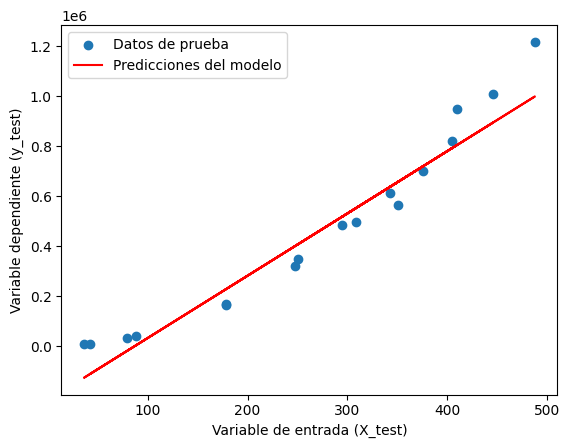

In [9]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con los datos de prueba
plt.scatter(X_test, y_test, label="Datos de prueba")

# Superponer la línea de predicciones del modelo en color rojo
plt.plot(X_test, y_pred, color="red", label="Predicciones del modelo")

# Añadir etiquetas y leyenda
plt.xlabel("Variable de entrada (X_test)")
plt.ylabel("Variable dependiente (y_test)")
plt.legend()

# Mostrar el gráfico
plt.show()